In [1]:
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf
import keras

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
# from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [2]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# 같은 폴더에 mnist.npz 다운 받기
# https://s3.amazonaws.com/img-datasets/mnist.npz
# MNIST 데이터 불러오기
#(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
import numpy as np
path = './mnist.npz'
with np.load(path, allow_pickle=True) as f:
    X_train, Y_train = f['x_train'], f['y_train']
    X_test, Y_test = f['x_test'], f['y_test']

In [4]:
# # MNIST 데이터 불러오기
# (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [8]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [9]:
# 모델의 실행
# 원래는 validation_data에 test 데이터를 쓰면 안됨. 별도로 valid data를 구성해주어야 함.
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.10420, saving model to ./model/01-0.1042.hdf5

Epoch 2: val_loss improved from 0.10420 to 0.07919, saving model to ./model/02-0.0792.hdf5

Epoch 3: val_loss did not improve from 0.07919

Epoch 4: val_loss improved from 0.07919 to 0.06902, saving model to ./model/04-0.0690.hdf5

Epoch 5: val_loss did not improve from 0.06902

Epoch 6: val_loss did not improve from 0.06902

Epoch 7: val_loss did not improve from 0.06902

Epoch 8: val_loss did not improve from 0.06902

Epoch 9: val_loss did not improve from 0.06902

Epoch 10: val_loss did not improve from 0.06902

Epoch 11: val_loss did not improve from 0.06902

Epoch 12: val_loss did not improve from 0.06902

Epoch 13: val_loss did not improve from 0.06902

Epoch 14: val_loss did not improve from 0.06902


In [11]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0952 - accuracy: 0.9780

 Test Accuracy: 0.9780


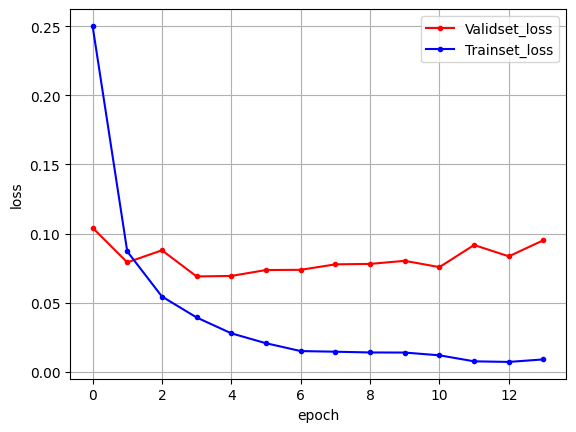

In [12]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()